In [151]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Original dataset
It has 33 columns and 578 rows

In [108]:
breast_cancer = pd.read_csv("C:\\Users\\PRIYANKA\\Documents\\IPL\\Capstone\\Data Science Foundation\\Building ML model\\BCdataog.csv")
breast_cancer.head(2)

,id,diagnosis,diagnosis_numeric,radius,texture,perimeter,area,smoothness,compactness,concavity,...,radius_worse,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,8510426.0,B,0.0,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,...,15.11,19.26,99.70,711.2,0.1440,0.1773,0.239,0.12880,0.2977,0.07259
1,8510653.0,B,NaN,13.08,15.71,85.63,520.0,0.10750,0.12700,0.04568,...,14.50,20.49,96.09,630.5,0.1312,0.2776,0.189,0.07283,0.3184,0.08183


In [109]:
breast_cancer.shape

(578, 33)

# Finding NAN and dropping them from the dataset

In [110]:
breast_cancer.isna().sum()

id                          0
diagnosis                   0
diagnosis_numeric          35
radius                      1
texture                     2
perimeter                   1
area                        5
smoothness                  3
compactness                 1
concavity                   3
concave_points              0
symmetry                    4
fractal_dimension           1
radius_se                   1
texture_se                  1
perimeter_se                0
area_se                     2
smoothness_se               2
compactness_se              2
concavity_se                1
concave_points_se           4
symmetry_se                 1
fractal_dimension_se        1
radius_worse                3
texture_worst               1
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           1
concavity_worst             0
concave_points_worst        1
symmetry_worst              0
fractal_dimension_worst     0
dtype: int

In [111]:
bc = breast_cancer.dropna()

In [112]:
bc.isna().sum()

id                         0
diagnosis                  0
diagnosis_numeric          0
radius                     0
texture                    0
perimeter                  0
area                       0
smoothness                 0
compactness                0
concavity                  0
concave_points             0
symmetry                   0
fractal_dimension          0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worse               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Finding out the number of benign cancer cases (B) and the number of malignant cancer cases (M)
- B = 347 patients
- M = 167 patients

In [113]:
bc['diagnosis'].value_counts()

B    347
M    167
Name: diagnosis, dtype: int64

# Visualizing the existing cases of B and M

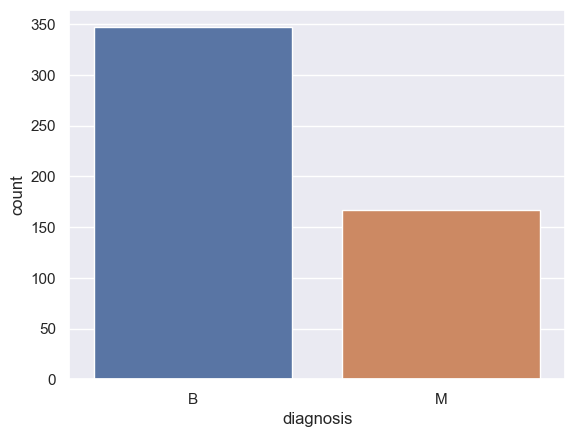

In [114]:
df1 = pd.DataFrame(bc)
sns.countplot(data=df1, x='diagnosis')
plt.show()

# Encoding values from the column 'diagnosis'
- B = 0
- M = 1

In [115]:
labelencoder_Y = LabelEncoder()
df1.iloc[:,1] = labelencoder_Y.fit_transform(df1.iloc[:,1].values)

C:\Users\PRIYANKA\AppData\Local\Temp\ipykernel_445812\483234879.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df1.iloc[:,1] = labelencoder_Y.fit_transform(df1.iloc[:,1].values)


In [116]:
df1.iloc[:,1]

0      0
10     0
11     0
12     0
14     0
      ..
567    1
568    1
570    1
571    1
574    1
Name: diagnosis, Length: 514, dtype: int32

# Plotting 6 variables and visualizing B and M in graphs

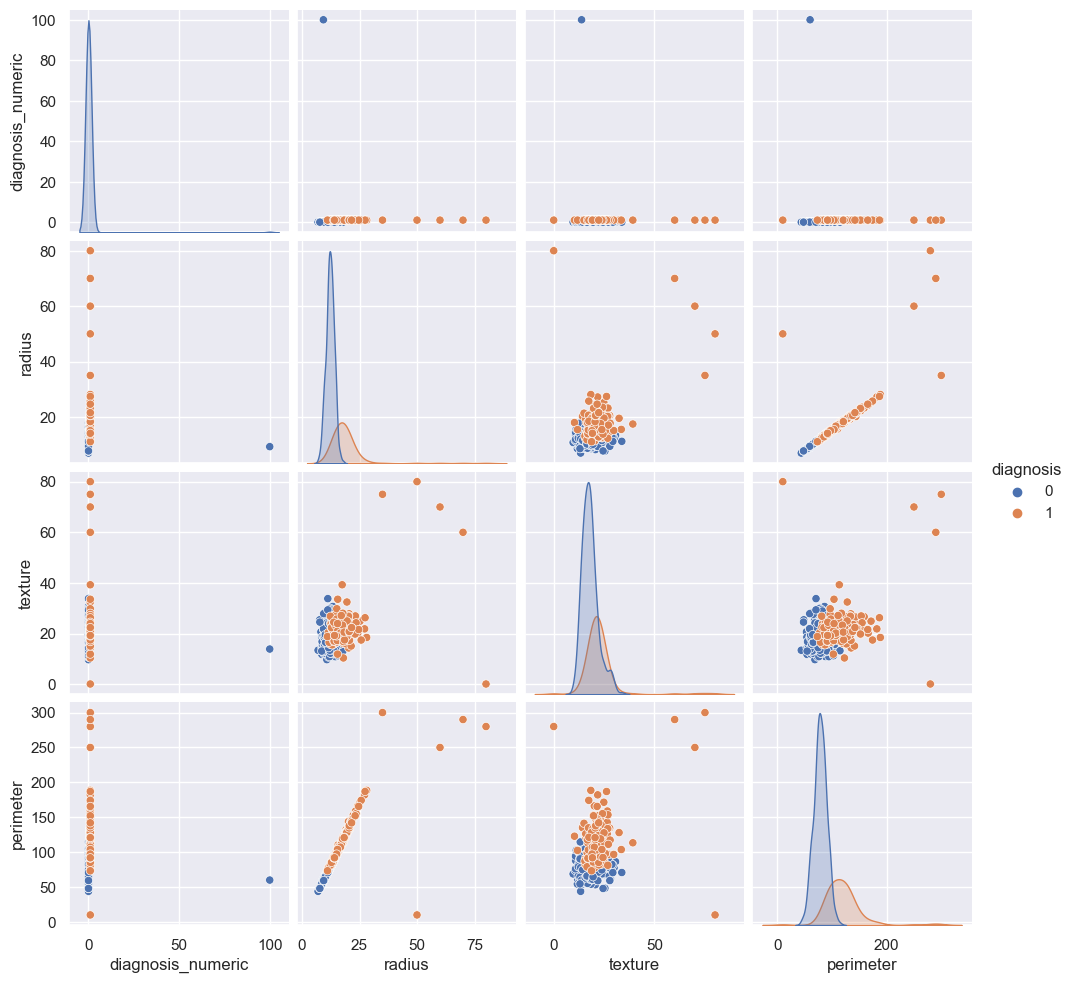

In [117]:
sns.pairplot(df1.iloc[:,1:6], hue = 'diagnosis')
plt.show()

# Dropping 'diagnosis numeric' from plots

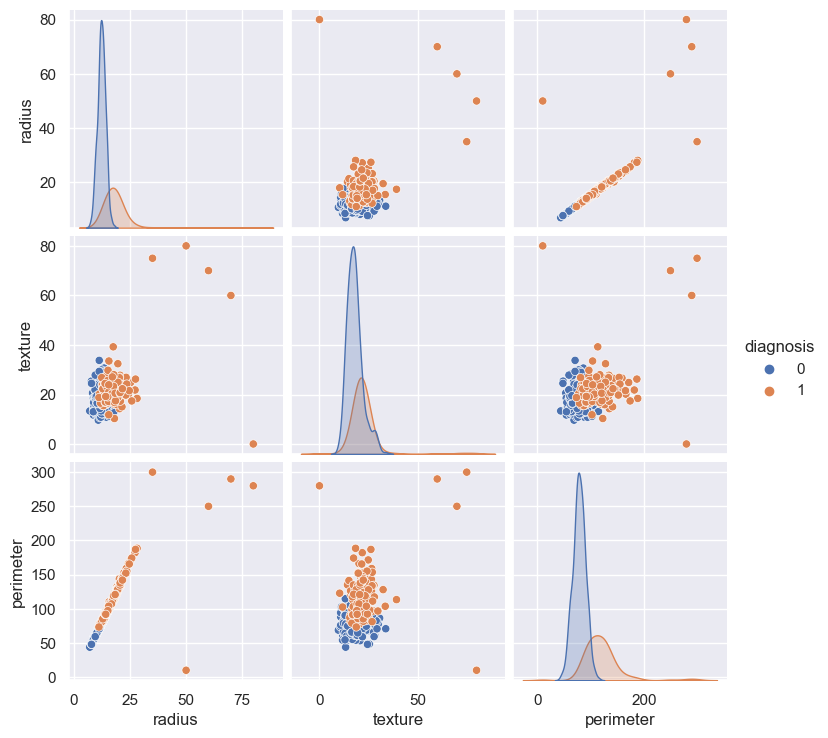

In [118]:
plot = ['diagnosis', 'radius', 'texture', 'perimeter']
subset = df1[plot]
sns.pairplot(subset, hue = 'diagnosis')
plt.show()

# Correlations
- To read correlations, first check the values in the rows and then see which columms they come under
- For e.g. 'Diagnosis' and 'Perimeter' have 66% correlation (Row 6, column 2)

In [119]:
df1.head(2)

,id,diagnosis,diagnosis_numeric,radius,texture,perimeter,area,smoothness,compactness,concavity,...,radius_worse,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,8510426.0,0,0.0,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,...,15.11,19.26,99.70,711.2,0.1440,0.1773,0.23900,0.12880,0.2977,0.07259
10,85759902.0,0,0.0,11.52,18.75,73.34,40900.0,0.09524,0.05473,0.03036,...,12.84,22.47,81.81,506.2,0.1249,0.0872,0.09076,0.06316,0.3306,0.07036


In [120]:
df1.corr()

,id,diagnosis,diagnosis_numeric,radius,texture,perimeter,area,smoothness,compactness,concavity,...,radius_worse,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.063730,0.004788,0.270309,0.421564,-0.122786,0.416218,0.001659,0.002855,0.375689,...,0.003777,0.002739,0.004139,0.003738,0.002158,0.003589,0.004044,0.004310,0.002581,0.002108
diagnosis,0.063730,1.000000,0.075474,0.539469,0.342845,0.662788,0.137769,0.337764,0.577656,0.171955,...,0.776116,0.421749,0.777090,0.743006,0.395469,0.569176,0.636434,0.772289,0.400569,0.287907
diagnosis_numeric,0.004788,0.075474,1.000000,0.019056,-0.002153,0.022686,0.007659,0.163569,0.079953,0.012950,...,0.031668,-0.010003,0.032088,0.036955,0.146386,0.050660,0.032899,0.056749,0.103295,0.047407
radius,0.270309,0.539469,0.019056,1.000000,0.466149,0.849114,0.452337,0.100420,0.299531,0.643630,...,0.584782,0.155648,0.583014,0.570821,0.063252,0.247010,0.318975,0.450902,0.097067,-0.007142
texture,0.421564,0.342845,-0.002153,0.466149,1.000000,0.360000,0.619015,-0.025135,0.138969,0.496830,...,0.216453,0.615991,0.216416,0.212301,0.045295,0.165299,0.177044,0.179871,0.063148,0.064638
perimeter,-0.122786,0.662788,0.022686,0.849114,0.360000,1.000000,0.307979,0.164265,0.445696,0.386730,...,0.794939,0.213245,0.795797,0.777500,0.107784,0.365476,0.458621,0.631903,0.147410,0.020927
area,0.416218,0.137769,0.007659,0.452337,0.619015,0.307979,1.000000,0.013758,0.023879,0.595145,...,0.060120,0.013321,0.059857,0.060791,0.006323,0.015692,0.028256,0.044371,0.024842,-0.008491
smoothness,0.001659,0.337764,0.163569,0.100420,-0.025135,0.164265,0.013758,1.000000,0.664343,0.006428,...,0.205259,0.011506,0.229149,0.206554,0.806845,0.476124,0.421198,0.504564,0.383053,0.488449
compactness,0.002855,0.577656,0.079953,0.299531,0.138969,0.445696,0.023879,0.664343,1.000000,0.010902,...,0.531948,0.212742,0.580476,0.522649,0.559203,0.860275,0.802983,0.814299,0.480718,0.670472
concavity,0.375689,0.171955,0.012950,0.643630,0.496830,0.386730,0.595145,0.006428,0.010902,1.000000,...,0.012214,0.007895,0.013306,0.011958,0.007298,0.012357,0.013939,0.014556,0.008502,0.007603


# Plotting correlations on heatmap
The darker the color, the lower the correlation

Method 1: Using Iloc function

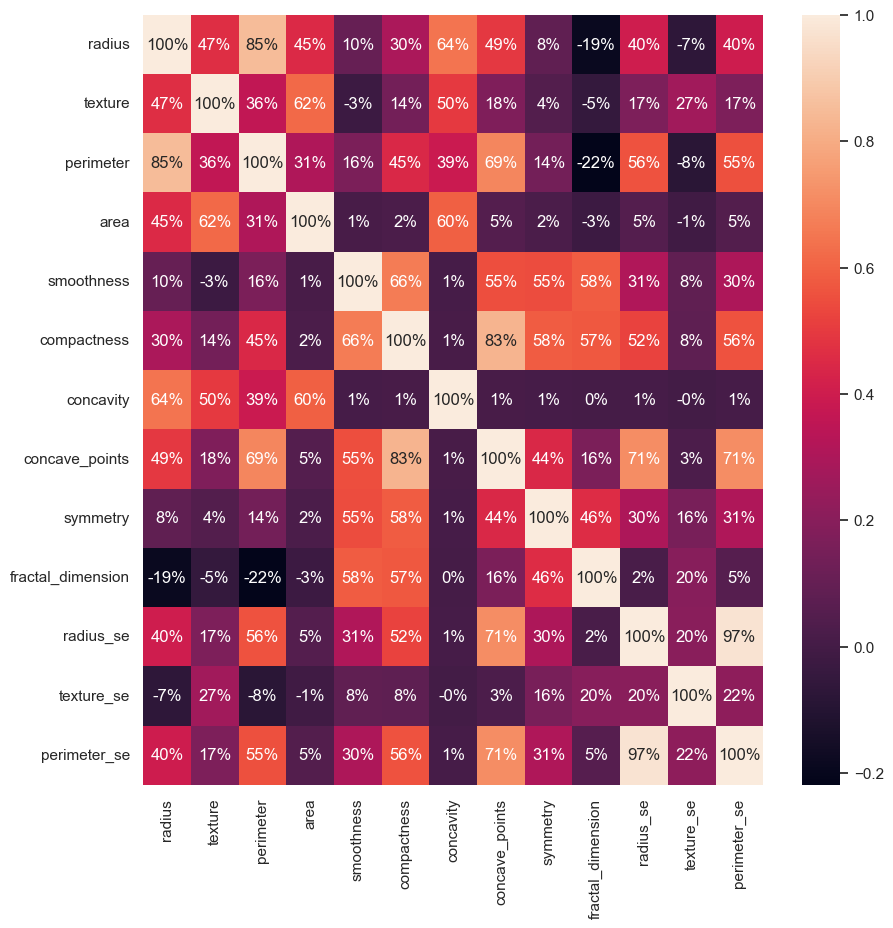

In [121]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.iloc[:,3:16].corr(), annot =True, fmt = '.0%')
plt.show()

Method 2: Using specific columns to see correlations

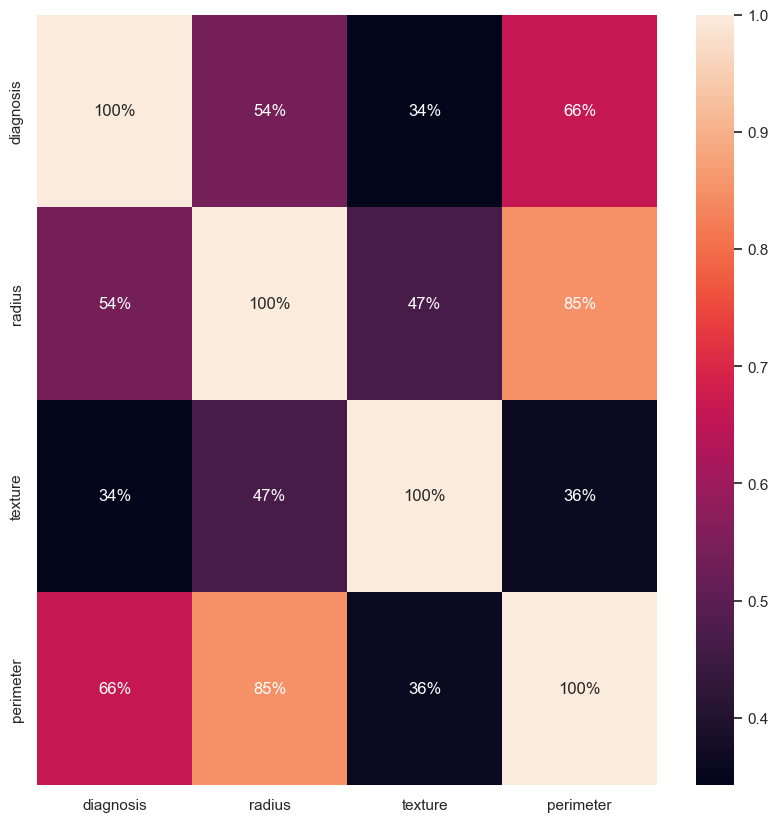

In [122]:
plt.figure(figsize=(10,10))
sns.heatmap(subset.corr(), annot =True, fmt = '.0%')
plt.show()

# Splitting the data in X and Y
- X numpy array: All columns except 'diagnosis' and 'diagnosis numeric' (Independent variables that contain feature values which helps Y categorize a case as 'benign' or 'malignant')
- Y numpy array: Only Diagnosis column (Dependent variable that consists of outcome variable based on feature values. It determines whether the patient has cancer (Malignant - M) or does not have cancer (Benign - B) given certain feature values)

Note: 0 is the index number for the first column 'ID' and 34 is the index number for the last column 'fractal dimension worst'

In [123]:
X = df1.iloc[:,3:34].values
Y = df1.iloc[:,1].values

# Splitting the data into 'training' (75% data) and 'testing' (25% data)

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Fitting the data into the scale of 0% to 100% - Feature Scaling
Only X values are used

In [125]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Creating a Logistic Regression Model

In [126]:
log = LogisticRegression(random_state=0)
log.fit(X_train, Y_train)

LogisticRegression(random_state=0)

# Creating a Decision Tree Model

In [127]:
tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Creating a Random Forest Classifier Model

In [128]:
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# Checking accuracy of models
- Logistic Regression Model accuracy: 99%
- Decision Tree and Random Forest Classifier: 100%

In [129]:
print('[0] Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
print('[1] Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
print('[2] Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))

[0] Logistic Regression Training Accuracy: 0.9922077922077922
[1] Decision Tree Classifier Training Accuracy: 1.0
[2] Random Forest Classifier Training Accuracy: 1.0


# Testing Model accuracy on test data using confusion matrix
- Cell 140 is a repetition of cells 127, 128 and 129 because confusion matrix was not running. 'Model' had to be defined

In [140]:
def models(X_train,Y_train):
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
    tree.fit(X_train, Y_train)
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    print('[0] Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1] Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    print('[2] Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
    
    return log, tree, forest

In [141]:
model = models(X_train, Y_train)

[0] Logistic Regression Training Accuracy: 0.9922077922077922
[1] Decision Tree Classifier Training Accuracy: 1.0
[2] Random Forest Classifier Training Accuracy: 1.0


# Results 
- LOGISTIC REGRESSION: 98.4% accuracy on test data
- True Positive = 87
- True Negative = 40
- DECISION TREE CLASSIFIER: 92.2% accuracy on test data
- True Positive = 82
- True Negative = 37
- RANDOM FOREST CLASSIFIER: 93.7% accuracy on test data
- True Positive = 85
- True Negative = 36

In [147]:
for i in range(len(model)):
    print('Model ', i)
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    TP = cm[0][0]
    TN = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
    print(cm)
    print('Testing accuracy = ', (TP+TN)/(TP+TN+FN+FP))

Model  0
[[87  1]
 [ 1 40]]
Testing accuracy =  0.9844961240310077
Model  1
[[82  6]
 [ 4 37]]
Testing accuracy =  0.9224806201550387
Model  2
[[85  3]
 [ 5 36]]
Testing accuracy =  0.937984496124031


# Method to check model accuracy of a single model
Change model's index position: model[0] or model [1] or model[2]

In [150]:
cm = confusion_matrix(Y_test, model[0].predict(X_test))
TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(cm)
print('Logistic Regression Testing accuracy written as model[0] in the code above = ', (TP+TN)/(TP+TN+FN+FP))

[[87  1]
 [ 1 40]]
Logistic Regression Testing accuracy written as model[0] in the code above =  0.9844961240310077


# Another way to test results of model accuracy on test data

In [153]:
for i in range(len(model)):
    print('Model ', i)
    print(classification_report(Y_test, model[i].predict(X_test)))
    print(accuracy_score(Y_test, model[0].predict(X_test)))
    print()

Model  0
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.98      0.98      0.98        41

    accuracy                           0.98       129
   macro avg       0.98      0.98      0.98       129
weighted avg       0.98      0.98      0.98       129

0.9844961240310077

Model  1
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        88
           1       0.86      0.90      0.88        41

    accuracy                           0.92       129
   macro avg       0.91      0.92      0.91       129
weighted avg       0.92      0.92      0.92       129

0.9844961240310077

Model  2
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        88
           1       0.92      0.88      0.90        41

    accuracy                           0.94       129
   macro avg       0.93      0.92      0.93       129
weighte

# Another way to test results of model accuracy on test data, one by one

In [154]:
print(classification_report(Y_test, model[0].predict(X_test)))
print(accuracy_score(Y_test, model[0].predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.98      0.98      0.98        41

    accuracy                           0.98       129
   macro avg       0.98      0.98      0.98       129
weighted avg       0.98      0.98      0.98       129

0.9844961240310077


https://www.youtube.com/watch?v=NSSOyhJBmWY